# Exercise 7: Data Preparation Lanjut : Feature Engineering
<hr>

Jika kita melihat cara kerja machine learning, mungkin terlihat simple. Sediakan data feature, input ke model, beritahu model nilai yang diharapkan. Done!

Pada kenyataannya, kita akan menghabiskan cukup banyak waktu untuk membuat model dan menentukan feature yang tepat untuk model machine learning.

Feature Engineering adalah bagaimana kita menggunakan pengetahuan kita dalam memilih features atau membuat features baru agar model machine learning dapat bekerja lebih akurat dalam memecahkan masalah.

Feature engineering akan memakan sebagian besar waktu kita saat membuat model machine learning. Jika kita melakukannya dengan baik, model yang dihasilkan akan mampu memprediksi atau memecahkan masalah lebih akurat.

Agar model dapat memprediksi dengan baik, maka kita harus input feature yang berkolerasi kuat dengan output yang diharapkan.

Feature juga diharapkan sesederhana mungkin agar mudah dimodelkan.

Memasukan feature yang tidak berkolerasi dengan output, akan mengacaukan model dalam menghasilkan prediksi. Contoh ekstrim, pada model klasifikasi bunga iris kita memasukan jumlah spesies sebagai feature. Jumlah tanaman tidak akan mempengaruhi dalam meng klasifikasi bunga iris, jika ini dimasukan dalam data training. Model akan menganggap ini penting dan akan mengacaukan prediksi nilai akhir.

![image.png](attachment:image.png)

                            Info dataset: Dataset ini berisi ukuran/measures 3 spesies iris

### import library yg dibutuhkan

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import seaborn untuk visualisasi
import seaborn as sns

# import Library SelectKBest
from sklearn.feature_selection import SelectKBest

# import Library chi kuadrat/squared
from sklearn.feature_selection import chi2

### load dataset

In [2]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Latihan(1)
buat dataframe tanpa kolom 'Id' yang ditampung dalam variabel bernama df1, lalu tampilkan

In [3]:
# Menghilangkan kolom Id memanfaatkan function iloc
df1= pd.read_csv('Iris.csv')

# lalu tampilkan
df1.iloc[0:150, 1:6]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Latihan(2)

* Buat variabel independent columns dan target kedalam variabel X dan y

In [4]:
#independent columns --> SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
X = df1.iloc[:, 1:5]

# target columns --> species
y = df1.iloc[:,-1:].values.ravel()

## Macam - macam strategi feature engineering

### 1. Seleksi Univariat
---
Uji statistik dapat digunakan utk memilih fitur-fitur tsb yang memiliki relasi paling kuat dengan variabel output

**Scikit-learn API** menyediakan kelas **SelectKBest** untuk mengekstrak fitur terbaik dari dataset yang diberikan. Metode SelectKBest memilih fitur sesuai dengan k skor tertinggi. Dengan mengubah parameter 'score_func' kita dapat menerapkan metode untuk data klasifikasi dan regresi. Memilih fitur terbaik adalah proses penting ketika kami menyiapkan kumpulan data besar untuk pelatihan. Ini membantu kami menghilangkan bagian data yang kurang penting dan mengurangi waktu pelatihan.

**chi-kuadrat** ini dapat digunakan untuk memilih n_fitur fitur dengan nilai tertinggi untuk uji statistik chi-kuadrat dari X, yang harus berisi hanya fitur non-negatif seperti boolean atau frekuensi (misalnya, jumlah istilah dalam klasifikasi dokumen), relatif terhadap kelas.

Ingatlah bahwa uji chi-kuadrat mengukur ketergantungan antara variabel stokastik, jadi menggunakan fungsi ini "menyingkirkan" fitur-fitur yang paling mungkin tidak bergantung pada kelas dan oleh karena itu tidak relevan untuk klasifikasi.

* Aplikasikan library **SelectKBest** untuk mengekstrak fitur terbaik dari dataset

In [5]:
#Apply SelectKBest class to extract

bestfeature = SelectKBest(score_func=chi2, k=4)
fit = bestfeature.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolums = pd.DataFrame(X.columns)

# Latihan(3)

* lihat hasil score seleksi feature

In [6]:
#gabungkan 2 dataframe tersebut untuk visualisasi yang lebih bagus

featureScores = pd.concat([dfcolums, dfscores],axis=1)
featureScores.columns = ['Field', 'Score']
print(featureScores.nlargest(10,'Score'))

           Field       Score
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828
0  SepalLengthCm   10.817821
1   SepalWidthCm    3.594499


### ExtraTreesClassifier
---
Tujuan dari **ExtraTreesClassifier** adalah untuk menyesuaikan sejumlah pohon keputusan acak ke data, dan dalam hal ini adalah dari pembelajaran ensemble. Khususnya, pemisahan acak dari semua pengamatan dilakukan untuk memastikan bahwa model tidak terlalu cocok dengan data.

* Aplikasikan library **ExtraTreesClassifier** untuk mengekstrak fitur terbaik dari dataset

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

# Latihan(4)

* visualisasikan hasil dari model ExtraTreesClassifier

[0.09255251 0.06095967 0.39286955 0.45361827]


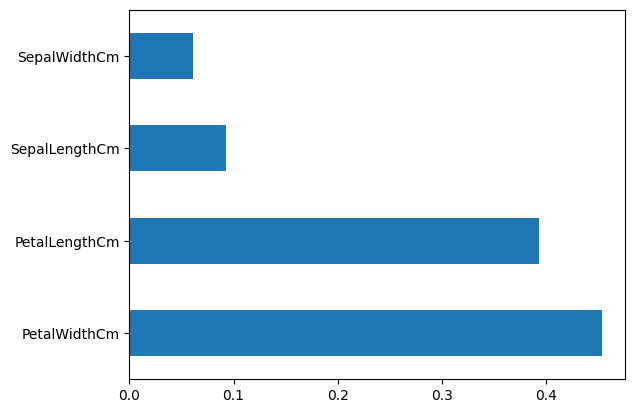

In [8]:
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

### Matriks Korelasi dengan Heatmap
---
* Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.
* Korelasi bisa positif (kenaikan satu nilai fitur meningkatkan nilai variabel target) atau negatif (kenaikan satu nilai fitur menurunkan nilai variabel target)
* Heatmap memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas fitur yang berkorelasi menggunakan seaborn library

> transform kolom target / y --> "Spesies" dari categorical menjadi numerical type

In [9]:
# transform kolom target menggunakan label encoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['Label_Species'] = labelencoder.fit_transform(df1['Species'])

In [10]:
# drop kolom Species (categorical data)
x = df1.drop('Id', axis=1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [11]:
# lihat korelasi antar fitur
x.corr()

<ipython-input-11-82c454fcd367>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label_Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Label_Species,0.782561,-0.419446,0.949043,0.956464,1.000000


# Latihan(5)

* hitung korelasi setiap fitur
* visualisasikan hasil dari Matriks Korelasi dengan Heatmap

<ipython-input-12-d5fdbca836e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x.corr()


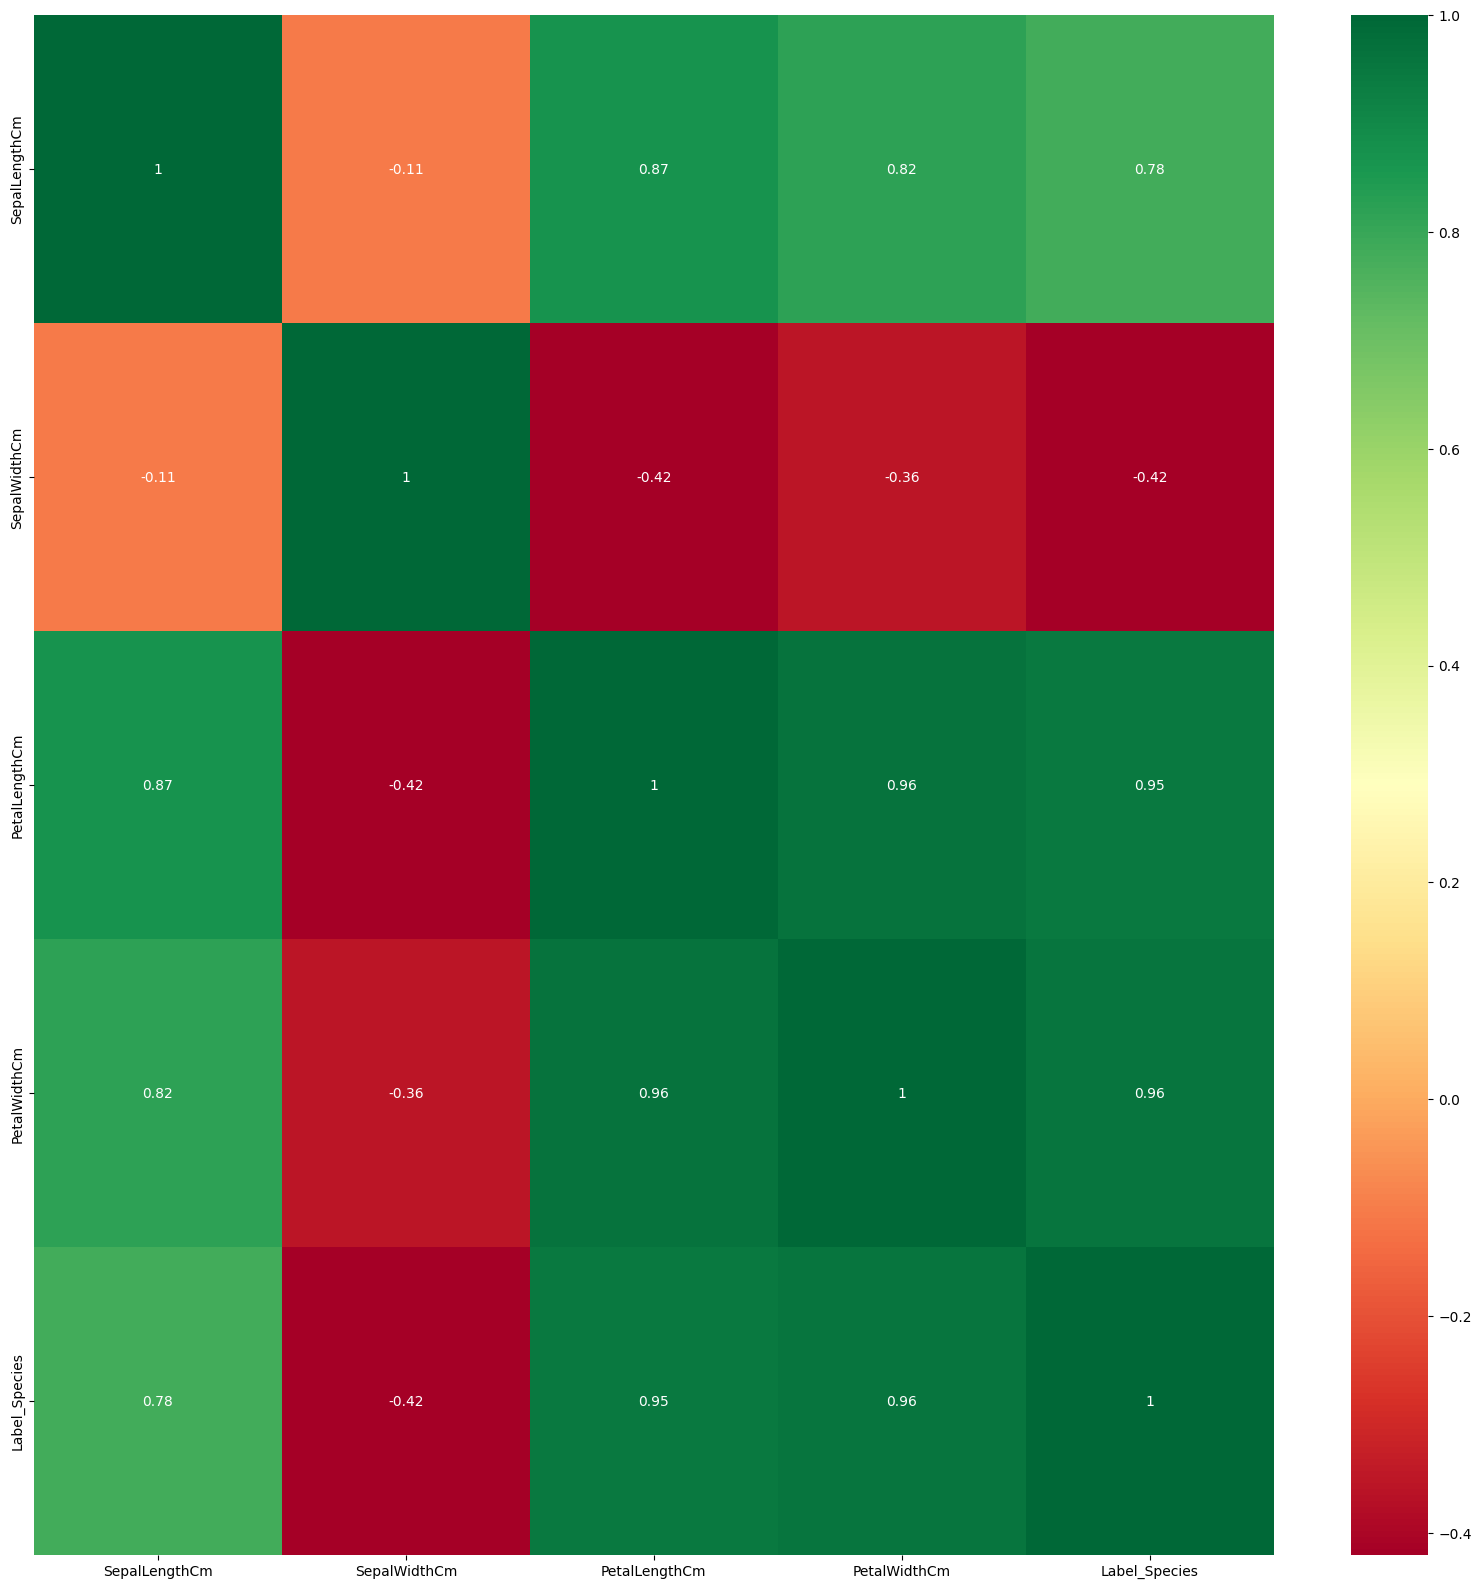

In [12]:
# mendapatkan korelasi di setiap fitur(X) dalam dataset
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heatmap
h = sns.heatmap(x[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
# korelasi antara setiap fitur dan target(Species setelah di transform label encoder --> Label_Species)
x.corr()['Label_Species']

<ipython-input-13-eff0361e7650>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr()['Label_Species']


SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Label_Species    1.000000
Name: Label_Species, dtype: float64

In [14]:
# filter korelasi yang lebih kuat dari 0,9 di kedua arah (positif atau negatif)
x.corr()['Label_Species'].abs() > .9

<ipython-input-14-3a2f4f6553f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr()['Label_Species'].abs() > .9


SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm     True
PetalWidthCm      True
Label_Species     True
Name: Label_Species, dtype: bool

<hr>
Dari hasil beberapa metode feature engineering diatas, didapatkan hasil bahwa fitur yang memiliki pengaruh besar terhadap data target adalah fitur/kolom PetalWidthCm dan PetalLengthCm.